In [43]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from math import factorial

# De Verjaardagenparadox

* Hoe groot is de kans dat in *deze* groep twee personen dezelfde verjaardag hebben?
* Hoe groot is de kans dat in een willekeurige groep twee personen dezelfde verjaardag hebben?
* Vanaf welk aantal personen is er een 50/50 kans dat twee personen dezelfde verjaardag hebben?
* Extra: [Het droevige verhaal over soulmates](https://what-if.xkcd.com/9/)

## Dobbelstenen

Bij een dobbelsteen is de kans om een '6' te gooien $\frac{1}{6}$. Elk van de zes vlakken heeft een grote kans. 

De kans om twee keer na elkaar een '6' te gooien? Dat is het geval bij een zesde, van een zesde van de worpen. Of $\frac{\frac{1}{6}}{6} = \frac{1}{6} \times \frac{1}{6} = \frac{1}{36} = 2.7\%$.

In ons verjaardagsprobleem heeft een persoon de keuze uit 365 mogelijke verjaardagen. We gaan er even van uit dat je verjaardag willekeurig is, en dus heeft elke dag van het jaar evenveel kans.


## Bob, Tom, en Jerry zijn jarig

Stel dat onze groep bestaat uit 3 personen. Bob, Tom, en Jerry. Wat is de kans dat twee van hen dezelfde verjaardag hebben? Dan moeten één van de volgende stellingen waar zijn:

* Bob, Tom, EN Jerry hebben dezelfde verjaardag 
* Alleen Bob en Tom hebben dezelfde verjaardag 
* Alleen Tom en Jerry hebben dezelfde verjaardag
* Alleen Jerry en Bob hebben dezelfde verjaardag

De kans dat alleen Bob en Tom dezelfde verjaardag delen is:
$ \frac{365}{365} \times \frac{1}{365} \times \frac{364}{365}$. Bob heeft de 'keuze' uit de volle 365 dagen. Tom moet dezelfde verjaardag hebben als Bob. Dus hij heeft geen keuze en mag maar 1 van de 365 dagen kiezen. Jerry's verjaardag moet op een andere dag dan die van Bob en Tom vallen. Voor Jerry zijn er 364 mogelijke dagen.

Als we alle gevallen op tellen dan krijgen dit monster:
$$ P = \frac{365}{365} \times \frac{1}{365} \times \frac{1}{365} + \frac{365}{365} \times \frac{1}{365} \times \frac{364}{365} + \frac{365}{365} \times \frac{1}{365} \times \frac{364}{365} + \frac{365}{365} \times \frac{1}{365} \times \frac{364}{365} $$

We kunnen het op dezelfde manier uitrekenen voor vier, vijf, of meer personen... maar het wordt al snel heel moeilijk. : /

In [44]:
p = ((1.0/360.0)*(1.0/360.0))+3*(364.0/(360.0**2))
print('P = {0:.5%}'.format(p))

P = 0.84336%


## Anders bekeken...

Als het probleem vanuit een ander perspectief bekijken wordt het heel wat makkelijker. Wat is de kans dat niemand een gemeenschappelijke verjaardag heeft? Ieders verjaardag valt op een andere dag. Voor onze groep van 3 personen is die kans:
$$ \frac{365}{365} \times \frac{364}{365} \times \frac{363}{365} $$

In een groep van 4 personen:

$$ \frac{365}{365} \times \frac{364}{365} \times \frac{363}{365} \times \frac{362}{365} $$

Enzovoort enzoverder. Wil je graag een mooie exotische formule? Here you go:

$$ P(\text{Niemand heeft dezelfde verjaardag}) = \frac{365!}{365^n \times (365-n)!}$$

*(Het uitroep teken is een speciale notatie, bijvoorbeeld: 5! = 5 x 4 x 3 x 2 x 1. 365! is dan gelijk aan 365 x 364 x 362 ... x 2 x 1)*

Maar we wilden eigenlijk het andere geval berekenen? Simpel. Trek het getal dat je bekomt af van '1'. Dit is de kans dat minstens twee personen dezelfde verjaardag hebben.

$$ P(\text{Minstens twee personen hebben dezelfde verjaardag}) = 1 - \frac{365!}{365^n \times (365-n)!}$$

Skip de rare code op de volgende lijnen ;) Het genereert een toffe grafiek die je eronder kan zien.

In [45]:
def chance_at_no_birthday_collision(x):
    if(x <= 365):
        return factorial(365) / ((365**x) * factorial(365-x))
    else:
        return 0

In [48]:
n = range(0, 366, 1)

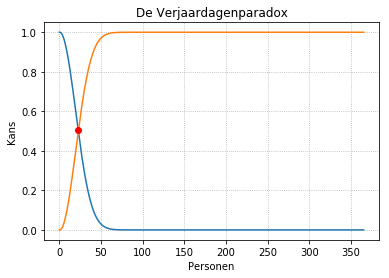

In [49]:
q = list(map(lambda x: chance_at_no_birthday_collision(x), n))
p = list(map(lambda x: 1-x,q))

intersections = np.flatnonzero(np.diff(
    np.sign(np.asarray(p) - np.asarray(q))
))


fig, ax = plt.subplots()
ax.plot(n, q)
ax.plot(n, p)

if(intersections.size > 0):
    intersection = intersections[0] + 1 # off by one
    ax.plot(n[intersection], p[intersection], 'ro')

ax.set(
    xlabel='Personen', 
    ylabel='Kans',
    title='De Verjaardagenparadox'
)
ax.grid(linestyle='dotted')

plt.show()

De blauwe lijn stelt de kans op '**geen** gemeenschappelijke verjaardag' voor. De oranje lijn is dan de kans op 'minstens 2 gemeenschappelijke verjaardagen'.

Vanaf 366 personen is de kans op een gemeenschappelijke verjaardag steeds 100%. Dat is logisch, er zijn maar 365 hokjes, dus is er eentje waar minstens 2 personen in zitten.

Maar zelfs in een groep van 50 personen is er al een kans van 97%.

De twee lijnen snijden elkaar bij 23 personen. Voor 23 personen is kans ongeveer 50%.

Hieronder een tabelletje met enkele waarden.

In [42]:
from IPython.display import HTML, display

samples = [1, 5, 10, 20, 23, 50, 100, 365]
data = list(map(lambda x: [x, '{0:.5%}'.format(p[x])], samples))

display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
))

1,0.00000%
5,2.71356%
10,11.69482%
20,41.14384%
23,50.72972%
50,97.03736%
100,99.99997%
365,100.00000%


# Conclusie

Als iemand je vraagt "Denk je dat er hier 2 personen dezelfde verjaardag hebben?".. tel dan het aantal personen om je heen. Zijn het er maar dan 23? Ga dan voor 'Ja'.